In [6]:
import os
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import scipy 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("data\wine-clustering.csv")

In [8]:
df.shape

(178, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Normalizing columns 

In [32]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

### KMeans on data to identify optimal cluster count

In [34]:
lst_k_values =list()
lst_inertia = list()

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0,n_init=10).fit(df)
    lst_k_values.append(i)
    lst_inertia.append(kmeans.inertia_)

<AxesSubplot: >

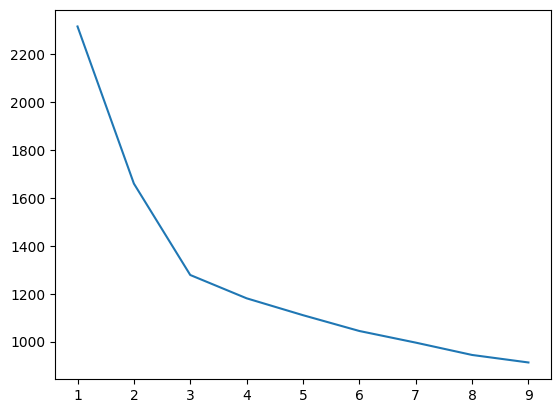

In [35]:
sns.lineplot(x=lst_k_values,y=lst_inertia)

_According to Elbow method, the value that best fits our data is 3_

In [36]:
kmeans = KMeans(n_clusters=3,random_state=0,n_init=10).fit(df)

In [38]:
lst_labels = kmeans.labels_
len(lst_labels)
df['labels'] = lst_labels

In [39]:
df.shape

(178, 14)

In [40]:
df['labels'].value_counts()

0    65
2    62
1    51
Name: labels, dtype: int64

_Clustering completed_

### PCA for 2D representation of clusters

In [41]:
pca = PCA(2) 
df_pca = df.drop(columns='labels')


In [42]:
df_pca.shape

(178, 13)

In [43]:
pca_result = pca.fit_transform(df_pca)

In [44]:
pca_result.shape

(178, 2)

In [53]:
df_pca_result = pd.DataFrame(pca_result,columns=['Component_1','Component_2'])

In [62]:
df_pca_result.shape,df_pca_result.columns

((178, 3), Index(['Component_1', 'Component_2', 'labels'], dtype='object'))

In [55]:
type(df_pca_result)

pandas.core.frame.DataFrame

In [58]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'labels'],
      dtype='object')

In [59]:
df_pca_result['labels'] = df['labels']

<AxesSubplot: xlabel='Component_1', ylabel='Component_2'>

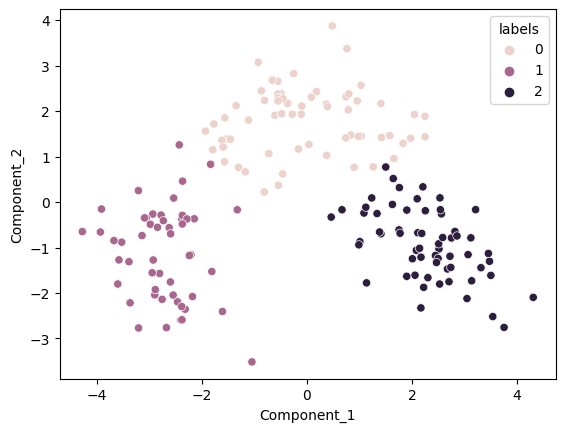

In [64]:
sns.scatterplot(data = df_pca_result, x = 'Component_1', y = 'Component_2', hue = 'labels')